In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time 
from citipy import citipy
import csv

In [2]:
api_key = 'e1c56e810c7e1826ff9ab208f8d5a3dd'
url = 'http://api.openweathermap.org/data/2.5/weather?'


In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)

cities = []

In [4]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [5]:
unique_lat_longs = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
     # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        unique_lat_longs.append(lat_lng)
        
# Print the city count to confirm sufficient count
print(cities[:10])
print(unique_lat_longs[:10])

['ushuaia', 'kapaa', 'taolanaro', 'hovd', 'castro', 'iqaluit', 'bulgan', 'basoko', 'port alfred', 'san cristobal']
[(-80.30243137370839, -77.21690432011141), (22.592792566922355, -161.29609093060398), (-63.12326797952707, 62.72826700602775), (42.45564393259011, 102.50756826135552), (-56.79534482776767, -108.84712958504798), (59.05671546279663, -66.52556643001674), (48.310176194937895, 102.37921704160829), (0.6374229138912, 22.37849091564746), (-76.56901092007858, 43.08595555323271), (-8.548679130384187, -88.48126697746318)]


In [6]:
temps = []
humidity = []
cloud = []
wind = []

for city in cities:
    query_url = url + 'appid=' + api_key + "&q=" + city + '&units=imperial'


#api.openweathermap.org/data/2.5/weather?q={city name}
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}

    response = requests.get(query_url)
    weather_data = response.json()
    
    try:
        temps.append(weather_data['main']['temp'])   
    except:
        print("No city data found")
        temps.append(np.nan)
        
    try:
        wind.append(weather_data['wind']['speed'])  
    except:
        print("No wind data found")
        wind.append(np.nan)
        
    try:
        humidity.append(weather_data['main']['humidity'])   
    except:
        print("No humidity data found")
        humidity.append(np.nan)
        
    try:
        cloud.append(weather_data['weather'][0]['main'])  
    except:
        print("No cloud data found")
        cloud.append(np.nan)
        
   

No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind data found
No humidity data found
No cloud data found
No city data found
No wind d

In [7]:
temps

[37.4,
 73.94,
 nan,
 33.8,
 53.6,
 12.2,
 21.28,
 85.5,
 74.79,
 51.8,
 71.77,
 56.34,
 14,
 32.52,
 46.4,
 68.71,
 36.58,
 18.45,
 -31.37,
 46.31,
 69.21,
 36.86,
 77.98,
 nan,
 71.5,
 70.15,
 43.14,
 81.85,
 17.95,
 39.2,
 83.83,
 60.21,
 -10.36,
 45.54,
 42.8,
 30.25,
 nan,
 69.08,
 66.1,
 75.2,
 42.3,
 61.38,
 69.97,
 66.2,
 -6.49,
 48.2,
 73.21,
 73.4,
 -25.43,
 41,
 38.84,
 23,
 63.58,
 66.2,
 71.6,
 43.83,
 71.1,
 nan,
 28.4,
 34.83,
 83.2,
 80.6,
 64.26,
 15.16,
 12.2,
 82.48,
 30.1,
 74.02,
 nan,
 66.01,
 74.25,
 22.6,
 70.36,
 75.2,
 85.63,
 86.17,
 42.8,
 55.4,
 14,
 28.12,
 77,
 nan,
 nan,
 80.91,
 22.72,
 74.83,
 41.43,
 -17.7,
 nan,
 39.2,
 -5.63,
 -5.45,
 nan,
 38.25,
 54.4,
 55.4,
 30.2,
 76.27,
 36.18,
 80.6,
 78.52,
 22.78,
 83.2,
 -33.08,
 44.19,
 78.8,
 81.36,
 83.43,
 75.2,
 75.2,
 nan,
 42.8,
 16.84,
 51.8,
 66.2,
 nan,
 75.33,
 -33.67,
 6.84,
 38.53,
 13.05,
 -14.14,
 23.17,
 nan,
 81.63,
 69.39,
 -20.21,
 46.92,
 84.2,
 24.39,
 54.05,
 nan,
 37.08,
 58,
 18.76,

In [9]:
query_url = url + 'appid=' + api_key + "&q=" + 'Bujumbura' + '&units=imperial'

response = requests.get(query_url)
weather_data = response.json()
print(weather_data['main']['temp'])

71.28


In [10]:
master_df = pd.DataFrame({'latitude_longitude': unique_lat_longs,'city': cities, 'temperature': temps, 'humidity': humidity, 'cloud_cover': cloud, 'wind': wind })
master_df.head()

,latitude_longitude,city,temperature,humidity,cloud_cover,wind
0,"(-80.30243137370839, -77.21690432011141)",ushuaia,37.40,93.0,Rain,33.33
1,"(22.592792566922355, -161.29609093060398)",kapaa,73.94,49.0,Clouds,13.87
2,"(-63.12326797952707, 62.72826700602775)",taolanaro,NaN,NaN,NaN,NaN
3,"(42.45564393259011, 102.50756826135552)",hovd,33.80,59.0,Clear,9.17
4,"(-56.79534482776767, -108.84712958504798)",castro,53.60,100.0,Clouds,4.70


In [11]:
print(len(temps))
print(len(humidity))
print(len(cloud))
print(len(wind))
print(len(cities))
print(len(unique_lat_longs))

635
635
635
635
635
635


In [12]:
print(unique_lat_longs[:30])

[(-80.30243137370839, -77.21690432011141), (22.592792566922355, -161.29609093060398), (-63.12326797952707, 62.72826700602775), (42.45564393259011, 102.50756826135552), (-56.79534482776767, -108.84712958504798), (59.05671546279663, -66.52556643001674), (48.310176194937895, 102.37921704160829), (0.6374229138912, 22.37849091564746), (-76.56901092007858, 43.08595555323271), (-8.548679130384187, -88.48126697746318), (-56.387638975263755, 166.80544922133356), (-51.55835722136651, 173.8730395234432), (63.7965112627364, 67.72564983523998), (43.015749735388795, -155.07525921191439), (39.16377761301598, 10.732347467133081), (80.92619324125042, -147.2523534251772), (48.180738922984034, -127.75657304165227), (62.36911800226255, 64.69222129939672), (83.34002814368495, 160.3325627953608), (39.20457654948291, -125.06304616192398), (-41.888885376523014, -11.991338839346923), (41.23132070811488, -56.12071024712358), (-38.26911212878904, -126.45691212457265), (-35.77714755431366, 47.274699566441996), (-

In [13]:
print(weather_data['wind']['speed'])

1.97


In [14]:
master_df['latitude_longitude']= master_df['latitude_longitude'].astype(str)

In [15]:
master_df2 = master_df['latitude_longitude'].str.strip('(')
master_df2.head()

0     -80.30243137370839, -77.21690432011141)
1    22.592792566922355, -161.29609093060398)
2      -63.12326797952707, 62.72826700602775)
3      42.45564393259011, 102.50756826135552)
4    -56.79534482776767, -108.84712958504798)
Name: latitude_longitude, dtype: object

In [16]:
master_df3 = master_df2.str.strip( ')' )
master_df3.head()

0     -80.30243137370839, -77.21690432011141
1    22.592792566922355, -161.29609093060398
2      -63.12326797952707, 62.72826700602775
3      42.45564393259011, 102.50756826135552
4    -56.79534482776767, -108.84712958504798
Name: latitude_longitude, dtype: object

In [19]:
new_df = master_df3.str.split(pat=',',n=1, expand=True)


In [20]:
df3 = new_df.rename(columns={0: 'Latitude', 1: 'Longitude'})


In [21]:
df3['Latitude']= df3['Latitude'].astype(float)
df3['Longitude']= df3['Longitude'].astype(float)
df3.head()

,Latitude,Longitude
0,-80.302431,-77.216904
1,22.592793,-161.296091
2,-63.123268,62.728267
3,42.455644,102.507568
4,-56.795345,-108.847130


In [22]:
final_table = pd.concat([master_df, df3], axis=1, join_axes=[master_df.index])



In [23]:
final_table =final_table.drop(['latitude_longitude'], axis=1)
final_table.head()

,city,temperature,humidity,cloud_cover,wind,Latitude,Longitude
0,ushuaia,37.40,93.0,Rain,33.33,-80.302431,-77.216904
1,kapaa,73.94,49.0,Clouds,13.87,22.592793,-161.296091
2,taolanaro,NaN,NaN,NaN,NaN,-63.123268,62.728267
3,hovd,33.80,59.0,Clear,9.17,42.455644,102.507568
4,castro,53.60,100.0,Clouds,4.70,-56.795345,-108.847130


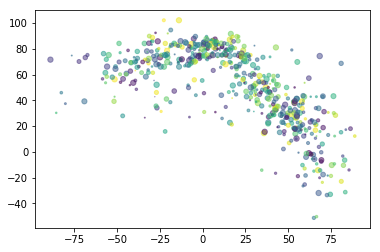

In [26]:
# Latitude vs Temperature Plot 


N = len(final_table)
x = final_table['Latitude']
y = final_table['temperature']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))  # 0 to 15 point radii
plt.title = 'City Latitude vs Max Temperature'
plt.xlabel = 'Latitude'
plt.ylabel = 'Max Temperature'
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.savefig('latitude_temp.png')
plt.show()

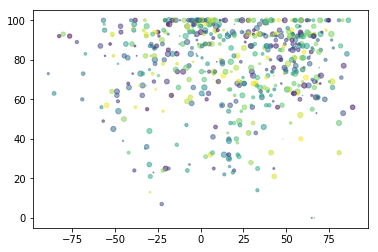

In [28]:
# Latitude vs Humidity Plot 


N = len(final_table)
x = final_table['Latitude']
y = final_table['humidity']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))  # 0 to 15 point radii
plt.title = 'City Latitude vs Humiditiy'
plt.xlabel = 'Latitude'
plt.ylabel = 'humidity'
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.savefig('latitude_humidity.png')
plt.show()

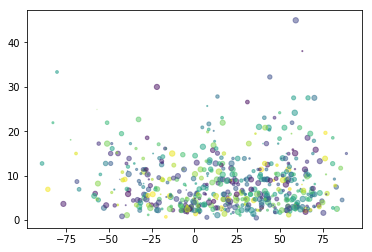

In [29]:
# Latitude vs Wind Speed Plot 

N = len(final_table)
x = final_table['Latitude']
y = final_table['wind']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))  # 0 to 15 point radii
plt.title = 'City Latitude vs Wind Speed'
plt.xlabel = 'Latitude'
plt.ylabel = 'Wind Speed'
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.savefig('latitude_windspeed.png')
plt.show()


In [ ]:

#save a csv and png images for each scatter plot

with open(results.txt, "wb") as csv_file:
        writer = csv.writer(final_table, delimiter=',')
        for line in data:
            writer.writerow(line)